<a href="https://colab.research.google.com/github/eunsun53/AI_toy_project/blob/main/img_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 699 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=a41baaec9dd6295c28a59d138818189392cb7802244ea6c00ddb0c230a8d438f
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [8]:
import tensorflow as tf
from tensorflow import keras
import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np 
import matplotlib.pyplot as plt 

In [9]:
#드라이브-코랩 연동 
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [10]:
cd /content/gdrive/MyDrive/dataset/fascode19/image

/content/gdrive/MyDrive/dataset/fascode19/image


In [12]:
cd ..

/content/gdrive/MyDrive/dataset/fascode19


In [32]:
import os 
import cv2
path = '/content/gdrive/MyDrive/dataset/fascode19/image'
os.chdir(path)
files = os.listdir(path)

img_data = []
for file in files:
  img = cv2.imread(file)
  if np.shape(img) == ():
    continue
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_data.append(img)


In [33]:
print(len(img_data))

2603


In [34]:
print(img_data[0])

[[[180 179 175]
  [180 179 175]
  [182 181 176]
  ...
  [235 235 235]
  [236 236 236]
  [236 236 236]]

 [[179 178 174]
  [179 178 174]
  [181 180 175]
  ...
  [235 235 235]
  [236 236 236]
  [236 236 236]]

 [[179 178 174]
  [179 178 174]
  [179 178 173]
  ...
  [235 235 235]
  [236 236 236]
  [236 236 236]]

 ...

 [[189 189 187]
  [189 189 187]
  [188 189 184]
  ...
  [219 219 221]
  [220 220 222]
  [221 221 223]]

 [[189 189 187]
  [189 189 187]
  [189 190 185]
  ...
  [219 219 221]
  [220 220 222]
  [221 221 223]]

 [[189 189 187]
  [189 189 187]
  [189 190 185]
  ...
  [219 219 221]
  [220 220 222]
  [221 221 223]]]


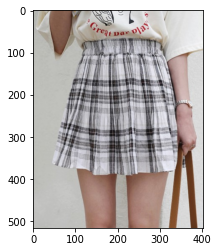

In [35]:
plt.imshow(img_data[0])

In [61]:
img = img_data[1]
print(img.shape)

(647, 487, 3)


In [43]:
image_generator = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [59]:
img.shape

(1, 647, 487, 3)

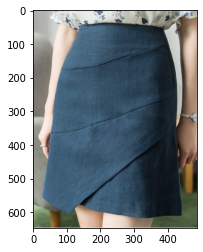

In [62]:
plt.imshow(img)

In [56]:
img = img.reshape((1,) + img.shape)
img.shape

(1, 647, 487, 3)

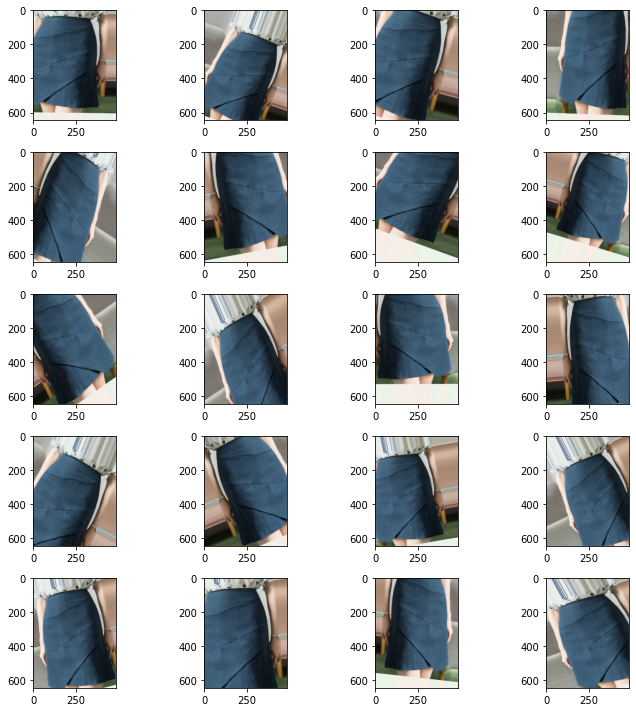

In [57]:
from tensorflow.keras.preprocessing import image

img_new = []
num = 0
fig = plt.figure(figsize = (10, 10))
for batch in image_generator.flow(img, batch_size = 1):
  img_new.append(fig.add_subplot(5, 4, num+1))
  img_new[num].imshow(image.array_to_img(batch[0]))
  num += 1
  if num%20 == 0:
      break
      
fig.tight_layout()
plt.show()
